In [51]:
import joblib
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.manifold import TSNE
from sklearn.exceptions import DataConversionWarning
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [77]:
#Loading Data and displaying

df= pd.read_csv('Exam_data.txt')


test_df = df.sample(n=25, random_state=42)
df_real= test_df[['diagnostico']]
df_predict = test_df.drop(columns=['id', 'diagnostico'])
df_real.reset_index(drop=True, inplace=True)
target_mapping = {'B': 0, 'M': 1}
df_real['diagnostico'] = df_real['diagnostico'].map(target_mapping)





df= df.drop(test_df.index)

display(df_predict)


C:\Users\lucas\AppData\Local\Temp\ipykernel_11840\1681455723.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['diagnostico'] = df_real['diagnostico'].map(target_mapping)


,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
204,12.470,18.60,81.09,103.78,481.9,0.09965,0.10580,0.080050,0.038210,0.1925,...,96.05,677.9,0.14260,0.23780,0.26710,0.786,0.10150,0.3014,0.08750,NaN
70,18.940,21.31,123.60,103.78,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,...,165.90,1866.0,0.11930,0.23360,0.26870,0.786,0.17890,0.2551,0.06589,NaN
131,15.460,19.48,101.70,103.78,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,...,124.90,1156.0,0.15460,0.23940,0.37910,0.786,0.15140,0.2837,0.08019,NaN
431,12.400,17.68,81.47,103.78,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,...,89.61,515.8,0.14500,0.26290,0.24030,0.786,0.07370,0.2556,0.09359,NaN
540,11.540,14.44,74.65,103.78,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,...,78.78,457.8,0.13450,0.21180,0.17970,0.786,0.06918,0.2329,0.08134,NaN
567,20.600,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,...,184.60,1821.0,0.16500,0.86810,0.93870,0.786,0.26500,0.4087,0.12400,NaN
369,22.010,21.90,147.20,103.78,1482.0,0.10630,0.19540,0.244800,0.150100,0.1824,...,195.00,2227.0,0.12940,0.38850,0.47560,0.786,0.24320,0.2741,0.08574,NaN
29,17.570,15.05,115.00,103.78,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,...,134.90,1227.0,0.12550,0.28120,0.24890,0.786,0.14560,0.2756,0.07919,NaN
81,13.340,15.86,86.49,103.78,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,...,96.66,614.9,0.15360,0.47910,0.48580,0.786,0.17080,0.3527,0.10160,NaN
477,13.900,16.62,88.97,103.78,599.4,0.06828,0.05319,0.022240,0.013390,0.1813,...,101.20,718.9,0.09384,0.20060,0.13840,0.786,0.06222,0.2679,0.07698,NaN


test_df.isnull().sum()

In [4]:
# Map diagnostic labels to numeric values for easier processing
# 'B' (benign) is mapped to 0 and 'M' (malignant) is mapped to 1
target_mapping = {'B': 0, 'M': 1}
df['diagnostico'] = df['diagnostico'].map(target_mapping)

In [5]:
#Basic data exploring
df.describe()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
count,5.440000e+02,544.000000,544.000000,544.000000,544.000000,5.440000e+02,544.000000,544.000000,544.000000,544.000000,...,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02,544.000000,544.000000,544.000000,147.000000
mean,3.147523e+07,0.369485,14.091724,19.285202,91.717592,1.037800e+02,651.528493,0.096240,0.103911,0.088239,...,106.976820,876.560662,0.132399,0.254026,0.272530,7.860000e-01,0.114439,0.290392,0.084044,0.492446
std,1.277007e+08,0.483110,3.503844,4.308240,24.137146,1.422393e-14,350.867837,0.014062,0.052541,0.079037,...,33.380507,568.827989,0.023013,0.156677,0.208363,1.111245e-16,0.065389,0.062492,0.018193,0.294882
min,8.913000e+03,0.000000,7.691000,9.710000,47.920000,1.037800e+02,170.400000,0.052630,0.019380,0.000000,...,54.490000,223.600000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040,0.008199
25%,8.691895e+05,0.000000,11.687500,16.177500,75.022500,1.037800e+02,419.525000,0.086038,0.065175,0.029635,...,84.057500,513.975000,0.116500,0.147575,0.114475,7.860000e-01,0.064987,0.250350,0.071468,0.210299
50%,9.056830e+05,0.000000,13.290000,18.835000,86.040000,1.037800e+02,546.350000,0.095720,0.092230,0.060070,...,97.620000,684.550000,0.131350,0.212900,0.226200,7.860000e-01,0.099425,0.282600,0.080050,0.476700
75%,8.910501e+06,1.000000,15.750000,21.785000,103.700000,1.037800e+02,775.375000,0.105100,0.130400,0.129650,...,125.025000,1045.500000,0.146150,0.340325,0.385300,7.860000e-01,0.161325,0.318700,0.092082,0.771003
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,...,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500,0.995380


In [6]:
#Checking for duplicated values

df[df.duplicated()]

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33


In [7]:
#Checking for null Values

df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       397
dtype: int64

In [8]:
# Drop the 'exame_33' column due to excessive missing data

df = df.drop(columns=['exame_33'])

In [9]:
# Separate the target variable from the explanatory variables
# Drop 'id' and 'diagnostico' columns to get the feature set
# Extract 'diagnostico' as the target variable

exam_values = df.drop(columns=['id', 'diagnostico'])

target = df[['diagnostico']]


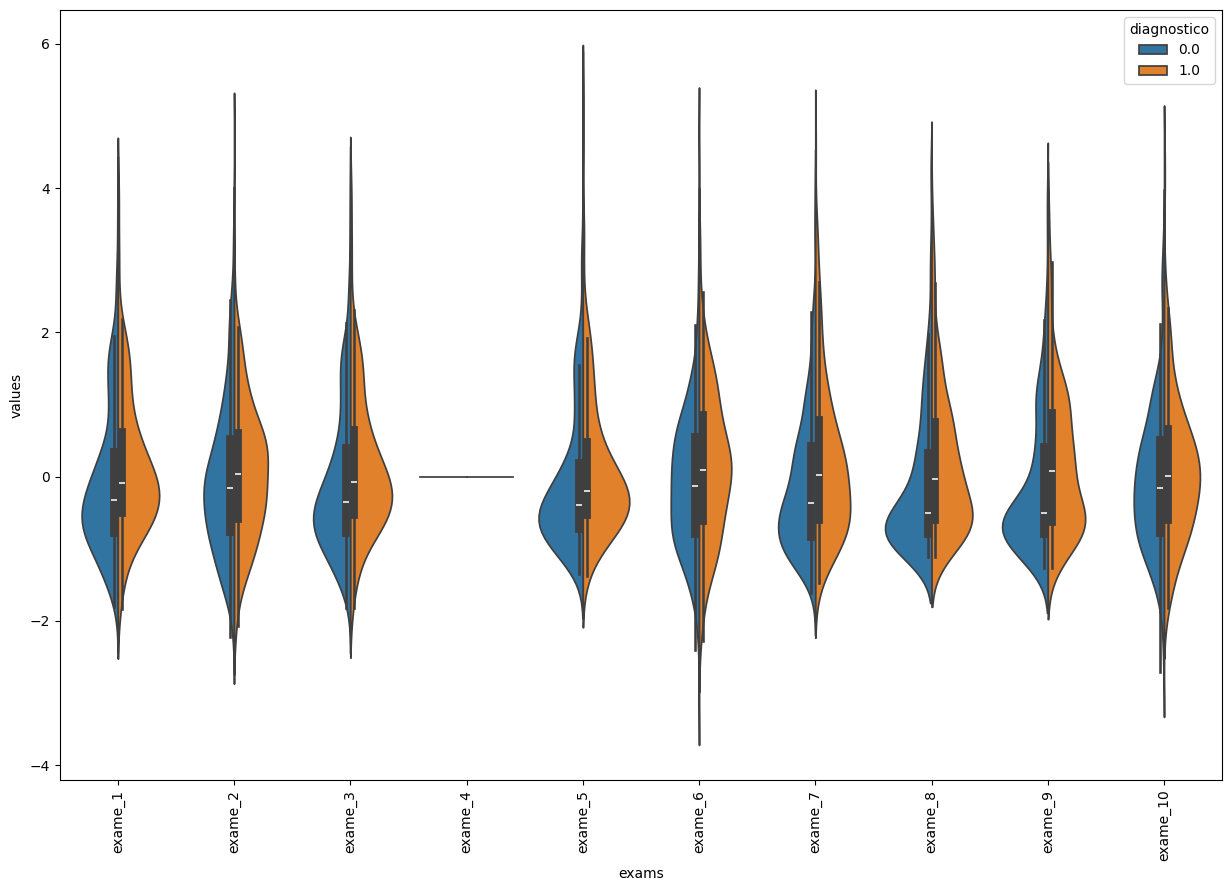

In [10]:
# Standardize the exam values
# Create violin plots to visualize exam distributions by target variable

scaler = StandardScaler()
scaler.fit(exam_values)
exam_values_v1 = scaler.transform(exam_values)
exam_values_v1 = pd.DataFrame(data=exam_values_v1, columns=exam_values.columns)

def violin_plot(values, first, last):

    plot_data = pd.concat([target, values.iloc[:, first:last]], axis=1)
    plot_data = pd.melt(plot_data, id_vars="diagnostico", var_name="exams", value_name='values')

    plt.figure(figsize=(15, 10))
    sns.violinplot(x="exams", y="values", hue="diagnostico", data=plot_data, split=True)
    plt.xticks(rotation=90)

violin_plot(exam_values_v1, 0, 10)


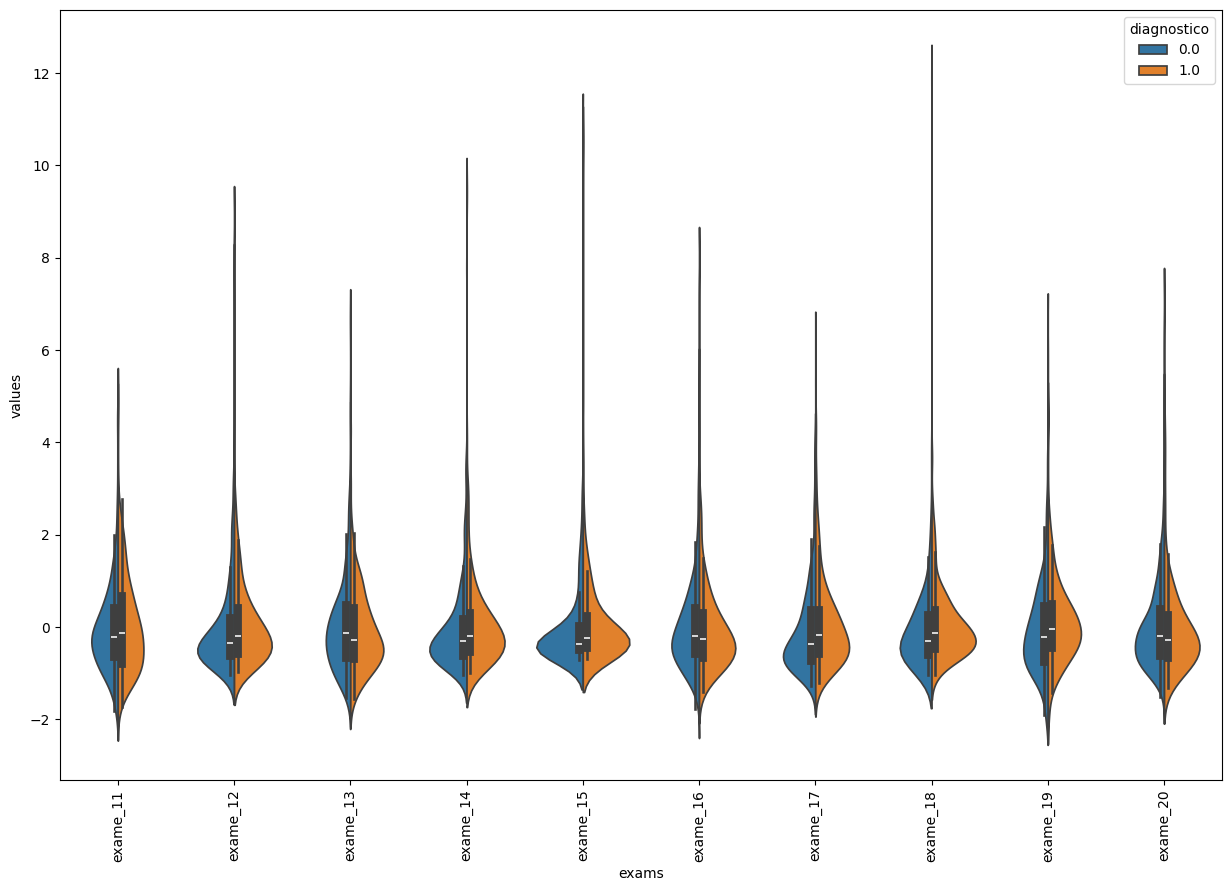

In [11]:
violin_plot(exam_values_v1, 10, 20)


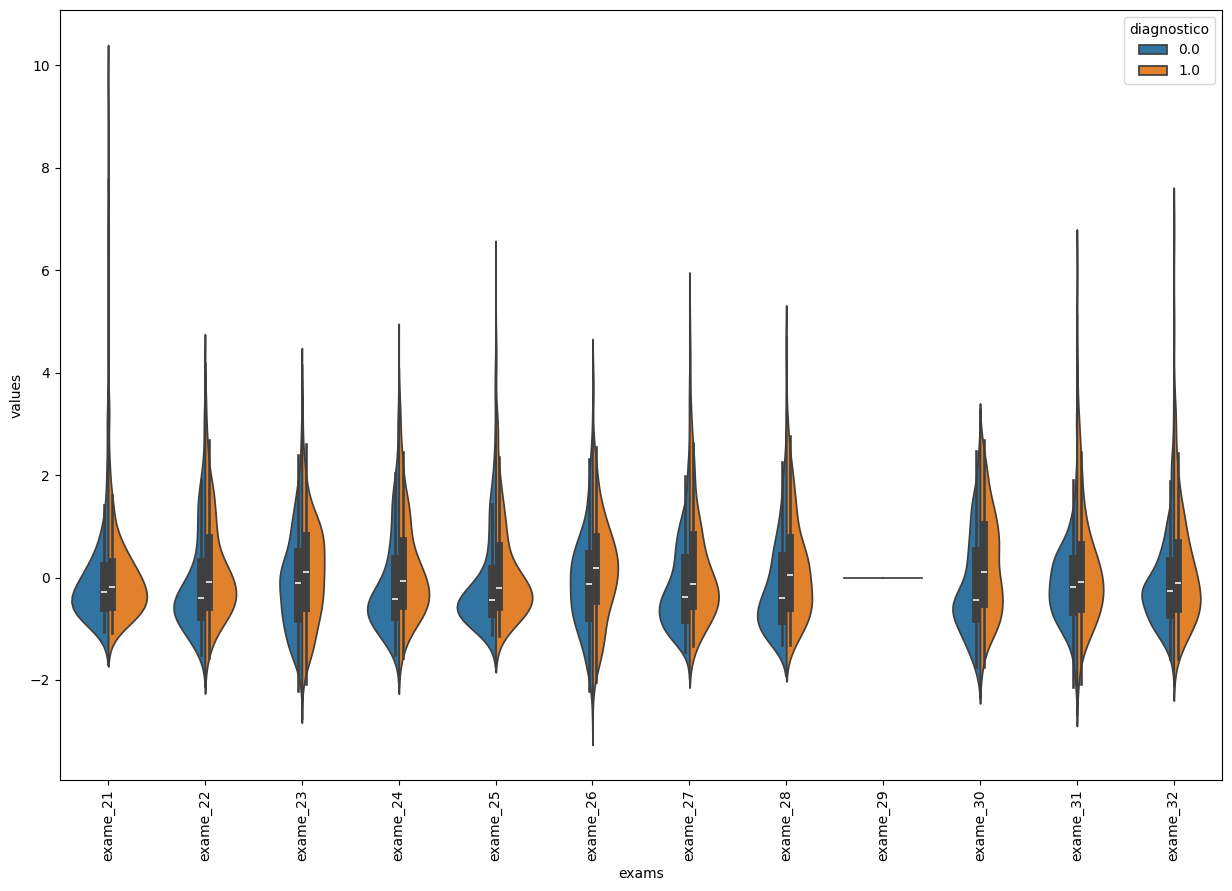

In [12]:
violin_plot(exam_values_v1, 20, 32)


In [13]:
# Based on the previous graphs, delete linear variables 'exame_4' and 'exame_29'

exam_values_v2 = exam_values_v1.drop(columns=['exame_4', 'exame_29'])


In [15]:
# Calculate correlation between variables
# Extract correlations above 0.99 and sum them
# Filter correlations greater than 1 and print

corr = exam_values_v2.corr()
corr_matrix = corr[corr > 0.99]
corr_matrix = corr_matrix.sum()
corr_matrix = corr_matrix[corr_matrix > 1]

print(corr_matrix)


exame_1     1.997805
exame_3     1.997805
exame_22    1.993674
exame_24    1.993674
dtype: float64


In [27]:
# Based on the result, delete one variable from each pair of highly correlated variables

exam_values_v3 = exam_values_v2.drop(columns=['exame_1', 'exame_24'])


In [17]:
# Split data and test the RandomForest model
# Note: The RandomForest model does not require encoding, but since our data is already encoded, it may not affect the final results.

def classifier_rf(valores):
    train_x, test_x, train_y, test_y = train_test_split(valores, target, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(train_x, train_y)
    
    print("Accuracy %.2f%%" % (classificador.score(test_x, test_y) * 100))

classifier_rf(exam_values_v3)

Accuracy 98.17%


c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [18]:
# Try using a DummyClassifier to check the accuracy

def classifier_dummy(valores):
    SEED = 4569
    random.seed(SEED)
    train_x, test_x, train_y, test_y = train_test_split(valores, target, test_size=0.3)

    dummy_classi = DummyClassifier(strategy="most_frequent")
    dummy_classi.fit(train_x, train_y)
    print("Accuracy %.2f%%" % (dummy_classi.score(test_x, test_y) * 100))

classifier_dummy(exam_values_v3)

Accuracy 64.02%


Unselected features: ['exame_6', 'exame_10', 'exame_11', 'exame_13', 'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21']


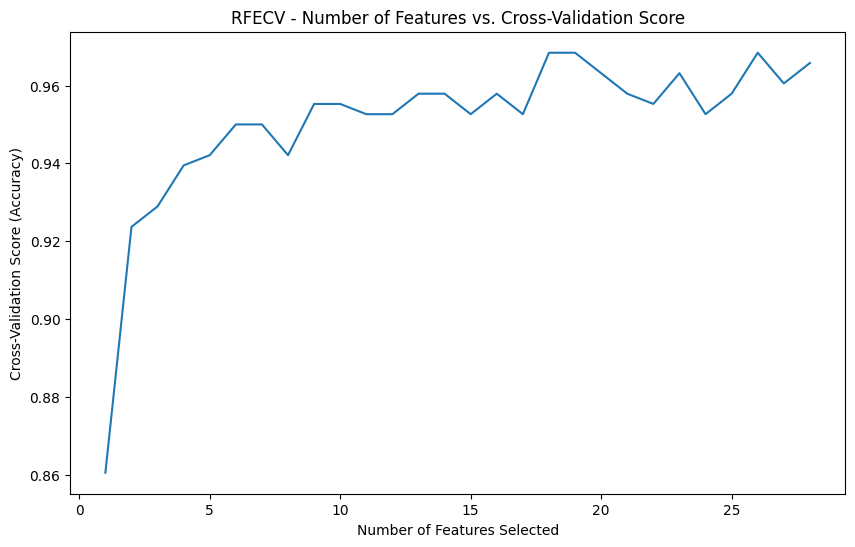

In [28]:
# Narrow down the number of variables using RFECV with RandomForest

def rfecv_rf(features, target):
    # Split data into training and test sets
    train_x, _, train_y, _ = train_test_split(features, target, test_size=0.3, random_state=SEED)
    
    # Initialize the random forest classifier
    classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
    
    # Initialize RFECV
    rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')
    
    # Fit RFECV to the training data
    rfecv.fit(train_x, train_y.values.ravel())
    
    # Get the unselected features
    unselected_features = train_x.columns[~rfecv.support_]
    
    # Print the unselected features
    print(f"Unselected features: {list(unselected_features)}")
    
    # Plot the number of features vs. cross-validation scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    plt.xlabel('Number of Features Selected')
    plt.ylabel('Cross-Validation Score (Accuracy)')
    plt.title('RFECV - Number of Features vs. Cross-Validation Score')
    plt.show()
    
    # Return the unselected features
    return unselected_features

# Call the function and assign the returned value to unselected_features
unselected_features = rfecv_rf(exam_values_v3, target)


In [20]:
# For this test project, we’ll keep 19 variables, which is reasonable given the limited dataset, 
# and we’ve chosen Random Forest as it performed well compared to the DummyClassifier. 
# In a real-world scenario, fewer variables might be selected, and more testing would be conducted before finalizing the model.

exam_values_v4 = exam_values_v3.drop(columns=unselected_features)



c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 95.12%


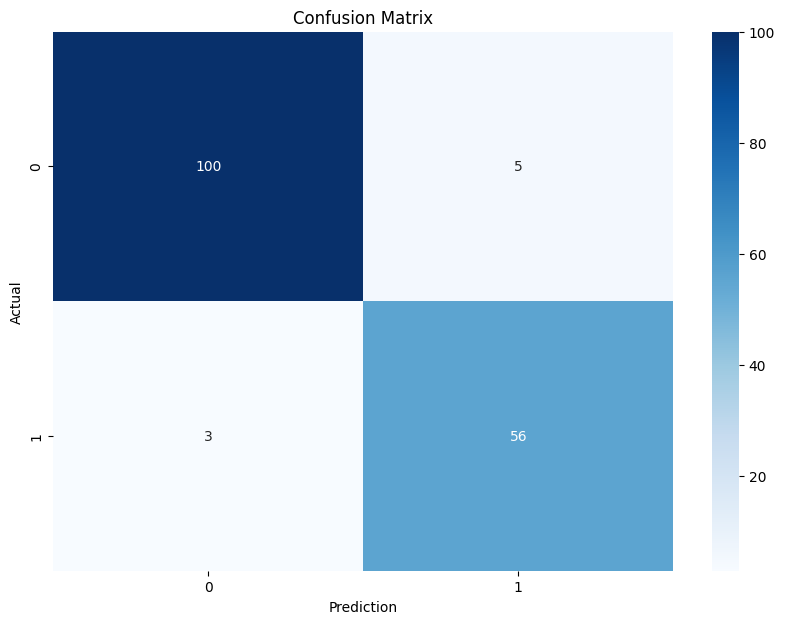

In [29]:
# We need to assess the model’s errors, focusing on minimizing false negatives, as it's crucial to correctly identify all cancer patients.

def classifier_rf(values):
    SEED = 4569
    random.seed(SEED)
    
    train_x, test_x, train_y, test_y = train_test_split(values, target, test_size=0.3, random_state=SEED)
    
    classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
    classifier.fit(train_x, train_y)
    
    predictions = classifier.predict(test_x)
    accuracy = accuracy_score(test_y, predictions)
    print(f"Accuracy: {accuracy*100:.2f}%")
    
    cm = confusion_matrix(test_y, predictions)
    cm_df = pd.DataFrame(cm, index=['0', '1'], columns=['0', '1'])
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

classifier_rf(exam_values_v4)

c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 91.46%


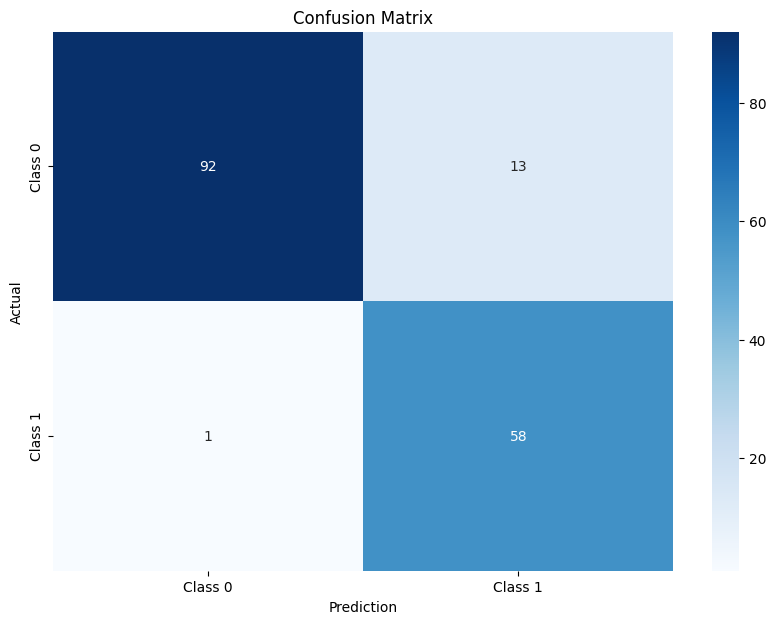

In [23]:
# The previous confusion matrix showed 3 false negatives, which we aim to reduce. 
# To address this, we will adjust the classification threshold to improve detection of positive cases.

def classifier_rf(values):
    SEED = 4569
    random.seed(SEED)
    
    train_x, test_x, train_y, test_y = train_test_split(values, target, test_size=0.3, random_state=SEED)
    
    classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
    
    classifier.fit(train_x, train_y)
    
    probas = classifier.predict_proba(test_x)[:, 1]
    threshold = 0.3
    predictions = (probas > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    print(f"Accuracy: {accuracy*100:.2f}%")
    
    cm = confusion_matrix(test_y, predictions)
    cm_df = pd.DataFrame(cm, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

classifier_rf(exam_values_v4)


c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConvers

Cross-Validation Accuracy: 97.37% ± 2.63%
Accuracy: 91.46%


c:\Users\lucas\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


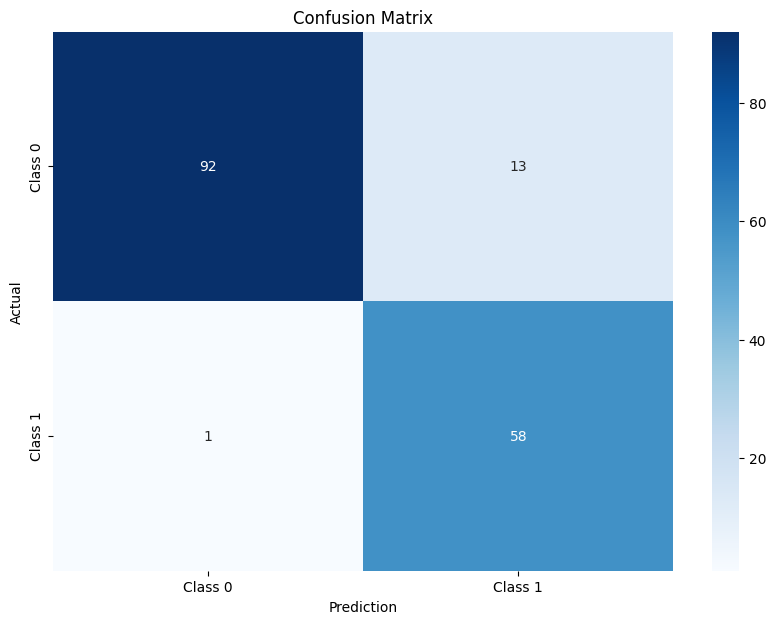

In [24]:
# Implement cross-validation to evaluate the model’s performance on the training data
# This will provide an accuracy estimate with standard deviation for better insight into model reliability

def classifier_rf(values):
    SEED = 4569
    random.seed(SEED)
    
    train_x, test_x, train_y, test_y = train_test_split(values, target, test_size=0.3, random_state=SEED)
    
    classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
    
    cv = StratifiedKFold(n_splits=10, shuffle=True)
    scores = cross_val_score(classifier, train_x, train_y, cv=cv, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")
    
    classifier.fit(train_x, train_y)
    
    probas = classifier.predict_proba(test_x)[:, 1]
    threshold = 0.3
    predictions = (probas > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    print(f"Accuracy: {accuracy*100:.2f}%")
    
    cm = confusion_matrix(test_y, predictions)
    cm_df = pd.DataFrame(cm, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

classifier_rf(exam_values_v4)


Accuracy: 75.00%


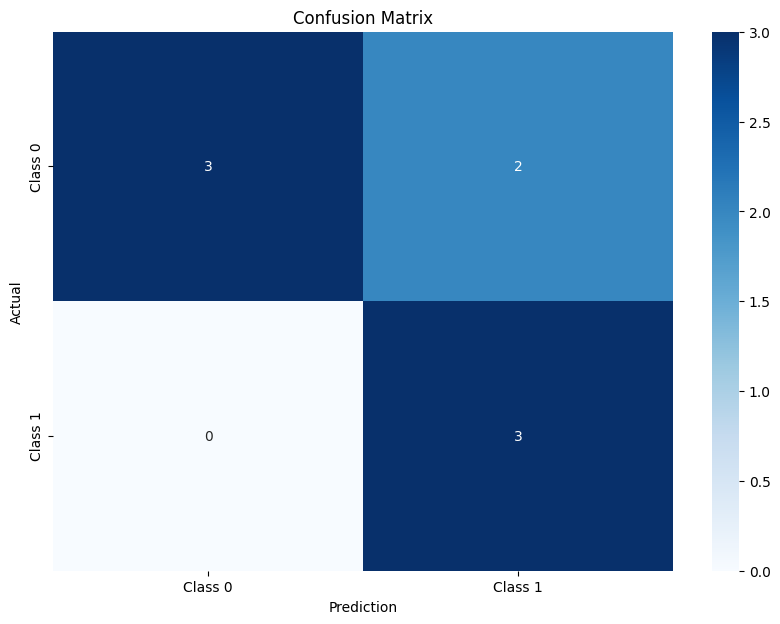

In [42]:
# As this is a sample model, we’ll accept a single error and focus on the cross-validation results. 
# We’ll proceed to the next step: assembling the full function and testing it with the initial dataset split.

def proccess(data):

    df=data
    
    target_mapping = {'B': 0, 'M': 1}
    df['diagnostico'] = df['diagnostico'].map(target_mapping)

    df= df.drop(columns=['exame_1', 'exame_24', 'exame_33', 'exame_4','exame_29','exame_6', 'exame_10', 'exame_11', 'exame_13', 'exame_16', 'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21'])

    target = df['diagnostico']
    exam_values = df.drop(columns=['id', 'diagnostico'])
 

    
    train_x, test_x, train_y, test_y = train_test_split(exam_values, 
                                                        target,
                                                        test_size=0.3,
                                                        random_state=SEED)
    
    classifier = RandomForestClassifier(n_estimators=100, random_state=SEED)
    classifier.fit(train_x, train_y)
    
    probas = classifier.predict_proba(test_x)[:, 1]
    threshold = 0.3
    predictions = (probas > threshold).astype(int)
    
    accuracy = accuracy_score(test_y, predictions)
    print(f"Accuracy: {accuracy*100:.2f}%")
    
    cm = confusion_matrix(test_y, predictions)
    cm_df = pd.DataFrame(cm, index=['Class 0', 'Class 1'], columns=['Class 0', 'Class 1'])
    
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
proccess(test_df)



In [79]:
# Now let's create functions to train the model and then another to accept input data and make predictions

SEED = 4569
MODEL_FILE = 'random_forest_model.pkl'

def train_and_save_model(train_data):
    target_mapping = {'B': 0, 'M': 1}
    if 'diagnostico' in train_data.columns:
        train_data['diagnostico'] = train_data['diagnostico'].map(target_mapping)
    
    train_data = train_data.drop(columns=['exame_1', 'exame_24', 'exame_33', 'exame_4', 'exame_29', 'exame_6', 
                                           'exame_10', 'exame_11', 'exame_13', 'exame_16', 'exame_17', 'exame_18', 
                                           'exame_19', 'exame_20', 'exame_21'])

    exam_values = train_data.drop(columns=['id', 'diagnostico'])
    target = train_data['diagnostico']
    
    train_x, _, train_y, _ = train_test_split(exam_values, target, test_size=0.3, random_state=SEED)
    
    model = RandomForestClassifier(n_estimators=100, random_state=SEED)
    model.fit(train_x, train_y)
    joblib.dump(model, MODEL_FILE)
    print("Model saved to", MODEL_FILE)



train_and_save_model(df)



def predict_with_saved_model(test_data):
    model = joblib.load(MODEL_FILE)

    target_mapping = {'B': 0, 'M': 1}
    features_to_drop = ['exame_1', 'exame_24', 'exame_33', 'exame_4', 'exame_29', 
                        'exame_6', 'exame_10', 'exame_11', 'exame_13', 'exame_16', 
                        'exame_17', 'exame_18', 'exame_19', 'exame_20', 'exame_21']

    test_data = test_data.drop(columns=features_to_drop, errors='ignore')

    exam_values = test_data

    probas = model.predict_proba(exam_values)[:, 1]
    threshold = 0.3
    predictions = (probas > threshold).astype(int)

    result_df = pd.DataFrame({
        'prediction': predictions
    })

    result_df.reset_index(drop=True, inplace=True)

    return result_df


predicted= predict_with_saved_model(df_predict)

print(predicted)




Model saved to random_forest_model.pkl
    prediction
0            0
1            1
2            1
3            0
4            0
5            1
6            1
7            1
8            1
9            0
10           0
11           1
12           0
13           1
14           0
15           1
16           0
17           0
18           0
19           1
20           0
21           0
22           1
23           0
24           0


In [81]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'actual_diagnostico': df_real['diagnostico'],
    'predicted': predicted['prediction']
})

comparison_df['correct'] = comparison_df['actual_diagnostico'] == comparison_df['predicted']
accuracy = comparison_df['correct'].mean() * 100

print("Comparison DataFrame:")
print(comparison_df.head())
print(f"Accuracy: {accuracy:.2f}%")

Comparison DataFrame:
   actual_diagnostico  predicted  correct
0                   0          0     True
1                   1          1     True
2                   1          1     True
3                   0          0     True
4                   0          0     True
Accuracy: 92.00%


We built a model to predict cancer diagnoses using Random Forest. We've done the basics with data prep, feature selection, and model testing.

For real-world projects, you'd want to do more fine-tuning and validation. Feel free to hit me up if you have any questions!

THANK YOU!